In [10]:
!ls

Does swapping makes layers closer?.ipynb
ET_accuracy_plots.ipynb
data
image_et
model_20250218_165037_bl1_ts12_bs128.pth
model_20250218_170429_bl12_ts1_bs128.pth
model_20250218_171155_bl12_ts1_bs128_si10_ss1.pth
model_20250218_181432_bl12_ts1_bs128_si5_ss1.pth
model_20250218_191848_bl12_ts1_bs128_si2_ss1.pth
model_20250218_202230_bl12_ts1_bs128_si1_ss1.pth
model_20250218_212821_bl12_ts1_bs128_si10_ss2.pth
model_20250218_223241_bl12_ts1_bs128_si5_ss2.pth
model_20250218_233527_bl12_ts1_bs128_si2_ss2.pth
model_20250219_003935_bl12_ts1_bs128_si1_ss2.pth
model_20250219_014311_bl12_ts1_bs128_si10_ss3.pth
model_20250219_024647_bl12_ts1_bs128_si5_ss3.pth
model_20250219_035025_bl12_ts1_bs128_si2_ss3.pth
model_20250219_045353_bl12_ts1_bs128_si1_ss3.pth
model_20250219_055732_bl12_ts1_bs128_si10_ss4.pth
model_20250219_070042_bl12_ts1_bs128_si5_ss4.pth
model_20250219_080432_bl12_ts1_bs128_si2_ss4.pth
model_20250219_090855_bl12_ts1_bs128_si1_ss4.pth
old_results
results_20250218_165037_bl1_ts12_bs128.

python(34279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


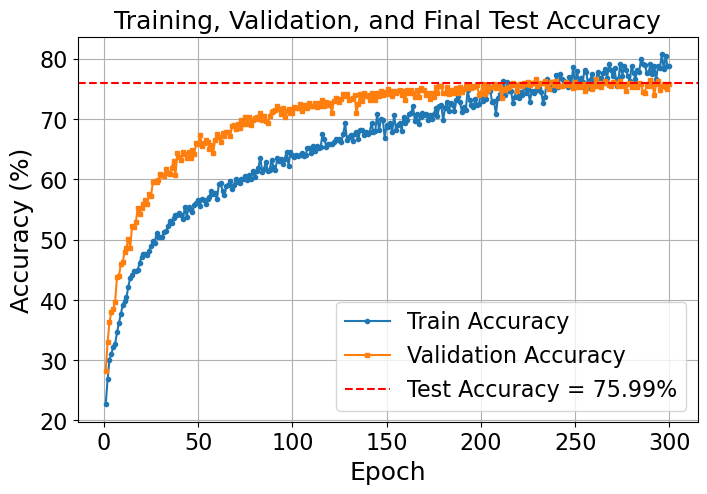

Final Test Accuracy: 75.99%


In [47]:
json_file = "results_20250218_170429_bl12_ts1_bs128.json"

import json
import matplotlib.pyplot as plt


with open(json_file, 'r') as f:
    data = json.load(f)

# Extract epoch, train accuracy, and validation accuracy
epochs = []
train_accs = []
val_accs = []

for entry in data["epoch_stats"]:
    epochs.append(entry["epoch"])
    train_accs.append(entry["train_acc"])
    val_accs.append(entry["val_acc"])

# Plot train and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accs, label='Train Accuracy', marker='o', markersize=3)
plt.plot(epochs, val_accs, label='Validation Accuracy', marker='s', markersize=3)

# Add a horizontal line for test accuracy
test_acc = data['test_acc']
plt.axhline(
    y=test_acc,
    color='r',
    linestyle='--',
    label=f'Test Accuracy = {test_acc}%'
)

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training, Validation, and Final Test Accuracy')
plt.grid(True)
plt.legend()
save_filename = f"et_standard_accuracy_plot.pdf"
plt.savefig(save_filename, format='pdf')
plt.show()

print(f"Final Test Accuracy: {test_acc}%")


In [8]:
"results_20250218_165037_bl1_ts12_bs128.json",

('results_20250218_165037_bl1_ts12_bs128.json',)

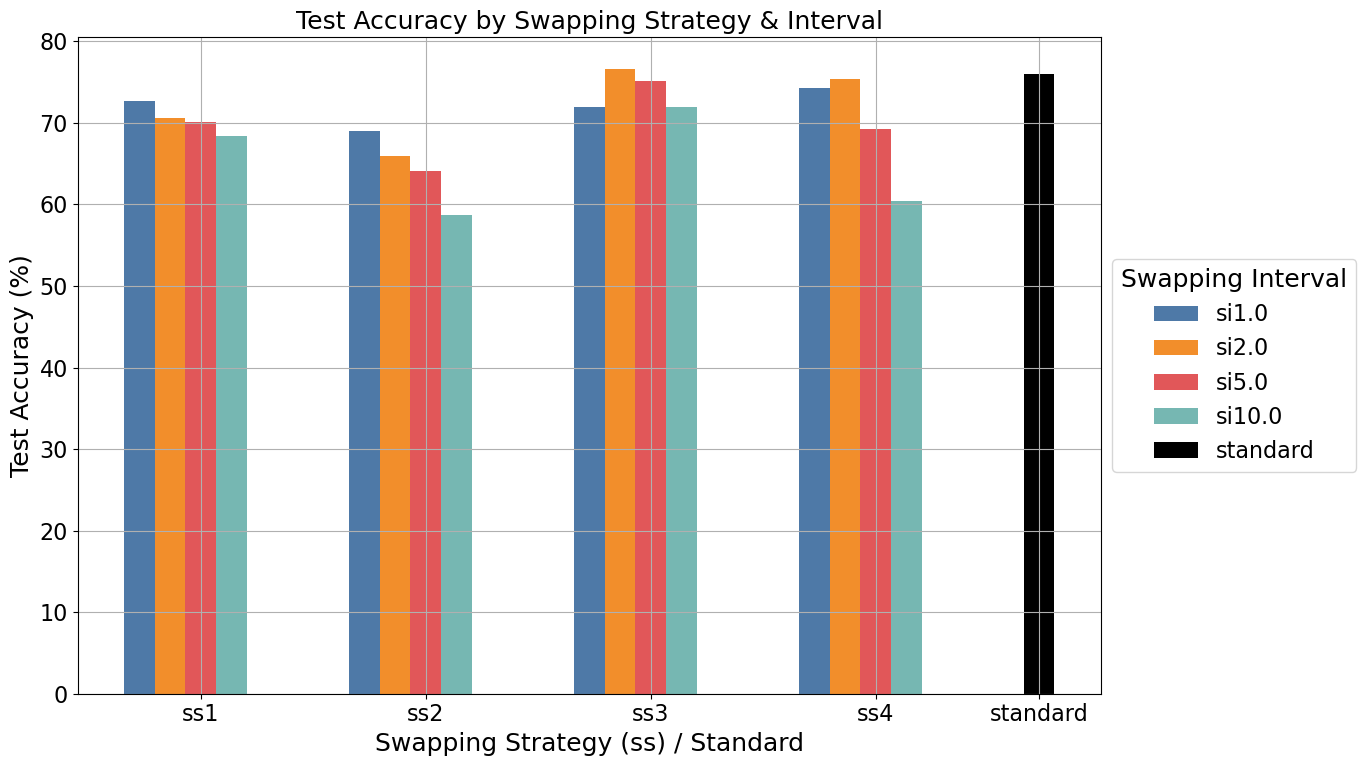

In [37]:
import re
import json
import numpy as np
import matplotlib.pyplot as plt

files = [
    "model_20250218_171155_bl12_ts1_bs128_si10_ss1.pth",
    "model_20250218_181432_bl12_ts1_bs128_si5_ss1.pth",
    "model_20250218_191848_bl12_ts1_bs128_si2_ss1.pth",
    "model_20250218_202230_bl12_ts1_bs128_si1_ss1.pth",
    "model_20250218_212821_bl12_ts1_bs128_si10_ss2.pth",
    "model_20250218_223241_bl12_ts1_bs128_si5_ss2.pth",
    "model_20250218_233527_bl12_ts1_bs128_si2_ss2.pth",
    "model_20250219_003935_bl12_ts1_bs128_si1_ss2.pth",
    "model_20250219_014311_bl12_ts1_bs128_si10_ss3.pth",
    "model_20250219_024647_bl12_ts1_bs128_si5_ss3.pth",
    "model_20250219_035025_bl12_ts1_bs128_si2_ss3.pth",
    "model_20250219_045353_bl12_ts1_bs128_si1_ss3.pth",
    "model_20250219_055732_bl12_ts1_bs128_si10_ss4.pth",
    "model_20250219_070042_bl12_ts1_bs128_si5_ss4.pth",
    "model_20250219_080432_bl12_ts1_bs128_si2_ss4.pth",
    "model_20250219_090855_bl12_ts1_bs128_si1_ss4.pth",
    "model_20250223_225517_bl12_ts1_bs128_si0.25_ss1.pth",
    "model_20250223_235915_bl12_ts1_bs128_si0.1_ss1.pth",
    "model_20250224_010336_bl12_ts1_bs128_si0.25_ss2.pth",
    "model_20250224_020755_bl12_ts1_bs128_si0.1_ss2.pth",
    "model_20250224_031133_bl12_ts1_bs128_si0.25_ss3.pth",
    "model_20250224_041527_bl12_ts1_bs128_si0.1_ss3.pth",
    "model_20250224_051906_bl12_ts1_bs128_si0.25_ss4.pth",
    "model_20250224_062330_bl12_ts1_bs128_si0.1_ss4.pth"
]

standard_file = "results_20250218_170429_bl12_ts1_bs128.json"

group_data = {}

# Regex for matching 'si' followed by 'ss'
pattern = re.compile(r'si([\d\.]+)_ss(\d+)')

for fname in files:
    match = pattern.search(fname)
    if not match:
        print(f"Skipping file {fname} because it doesn't match the expected pattern.")
        continue

    si_str, ss_str = match.groups()
    si = float(si_str)
    ss = int(ss_str)

    try:
        with open(fname, 'r') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error loading {fname}: {e}")
        continue

    # Use "test_acc" instead of "final_test_acc"
    test_acc = results.get("test_acc")
    if test_acc is None:
        print(f"File {fname} does not have 'test_acc'. Skipping.")
        continue

    if ss not in group_data:
        group_data[ss] = {}
    group_data[ss][si] = test_acc

# Load the standard file and use "test_acc"
try:
    with open(standard_file, 'r') as f:
        standard_results = json.load(f)
    standard_test_acc = standard_results.get("test_acc", np.nan)
except Exception as e:
    print(f"Error loading standard file {standard_file}: {e}")
    standard_test_acc = np.nan

# Collect and sort all ss and si keys
all_ss = sorted(group_data.keys())  # e.g., [1, 2, 3, 4]
all_si = sorted({si for subdict in group_data.values() for si in subdict.keys()})
n_ss = len(all_ss)
n_intervals = len(all_si)

##########################################################
# Figure and spacing adjustments
##########################################################
fig, ax = plt.subplots(figsize=(14, 8))

# Adjust bar width and the gap between groups
bar_width = 0.12
group_gap = 0.4  # extra spacing between groups

# Total width taken by all bars for one group
group_width = bar_width * n_intervals

# The centers of each group (for each ss) will be:
x_ss = np.arange(n_ss) * (group_width + group_gap)

# Position for the standard model bar (after all groups)
x_standard = x_ss[-1] + (group_width + group_gap)

# Define a professional color palette (Tableau 10 or similar)
professional_colors = [
    "#4e79a7",  # muted blue
    "#f28e2b",  # orange
    "#e15759",  # red
    "#76b7b2",  # teal
    "#59a14f",  # green
    "#edc949",  # yellow
    "#af7aa1",  # purple
    "#ff9da7",  # pink
    "#9c755f",  # brown
    "#bab0ac",  # gray
]

if n_intervals > len(professional_colors):
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in range(n_intervals)]
else:
    colors = professional_colors[:n_intervals]

##########################################################
# Plot the swapped models
##########################################################
for j, si in enumerate(all_si):
    # For each ss, get the test acc for this si (or NaN if missing)
    accuracies = [group_data[ss].get(si, np.nan) for ss in all_ss]
    
    # Position for this particular si within each group
    x_positions = x_ss + j * bar_width
    
    ax.bar(x_positions, accuracies, width=bar_width,
           label=f'si{si}', color=colors[j])

# Plot the standard model bar at the far right
ax.bar(x_standard, standard_test_acc, width=bar_width,
       label='standard', color='black')

##########################################################
# X-ticks and legend
##########################################################
# Labels for the groups (ss1, ss2, etc.) at the midpoints of each group
group_centers = x_ss + group_width / 2
xticks_positions = np.concatenate((group_centers, [x_standard]))
xticks_labels = [f'ss{ss}' for ss in all_ss] + ['standard']

ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels)

ax.set_xlabel('Swapping Strategy (ss) / Standard')
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Test Accuracy by Swapping Strategy & Interval')

ax.legend(title="Swapping Interval", loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)

plt.tight_layout()
save_filename = f"et_full_accuracy_plot.pdf"
plt.savefig(save_filename, format='pdf')
plt.show()


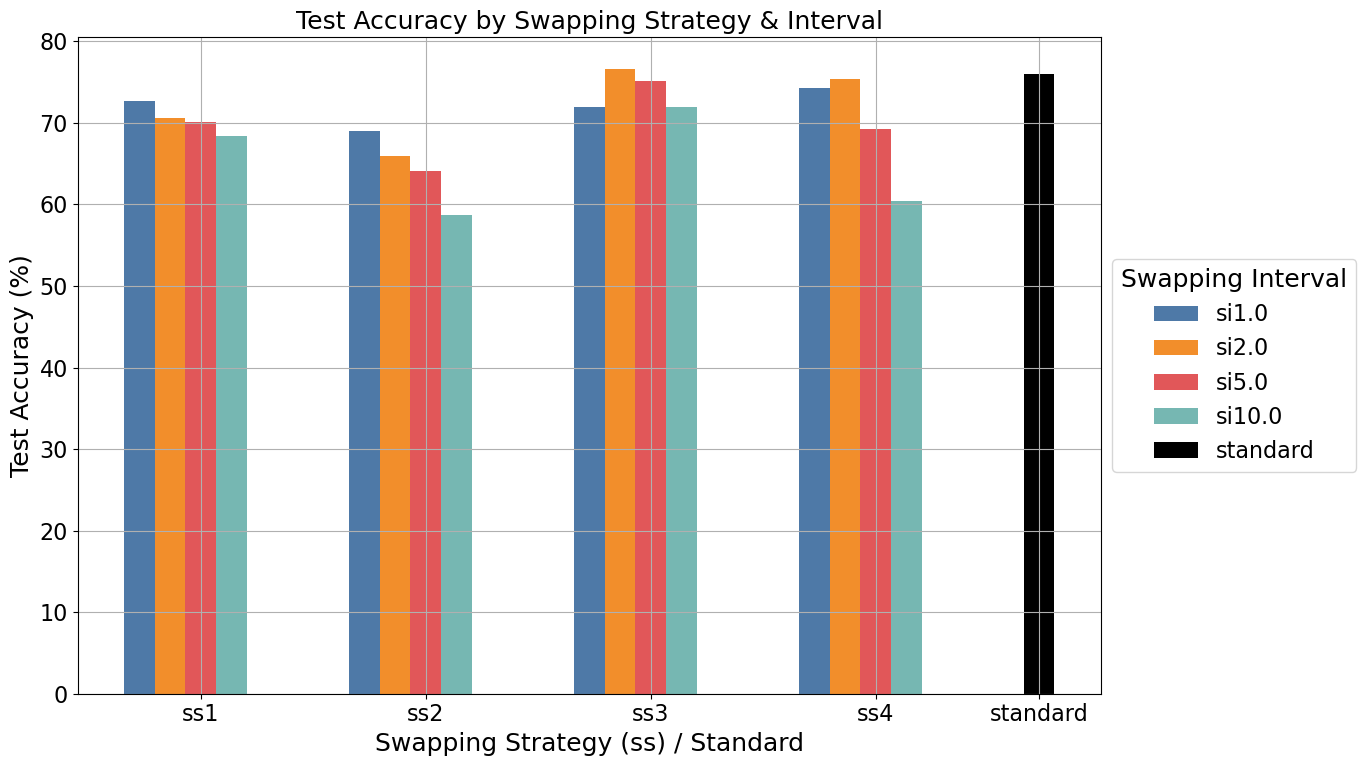

Accuracy scores dictionary:
{'swapped': {2: {5.0: 64.1, 2.0: 65.96, 1.0: 69.0, 10.0: 58.68}, 3: {10.0: 71.92, 5.0: 75.17, 2.0: 76.66, 1.0: 72.01}, 4: {10.0: 60.38, 5.0: 69.22, 2.0: 75.41, 1.0: 74.24}, 1: {10.0: 68.43, 5.0: 70.11, 2.0: 70.63, 1.0: 72.64}}, 'standard': 75.99}


In [38]:
import re
import json
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_by_swapping_strategy(files, standard_file):
    """
    Processes a list of JSON files containing test accuracy scores, groups them
    by swapping strategy (ss) and interval (si), and plots the results as a bar chart.
    
    The standard model's test accuracy is loaded from 'standard_file'.
    
    Returns:
        A dictionary with the structure:
            {
                "swapped": { ss1: {si1: test_acc, si2: test_acc, ...}, ss2: {...}, ... },
                "standard": standard_test_acc
            }
    """
    group_data = {}

    # Regex for matching 'si' followed by 'ss'
    pattern = re.compile(r'si([\d\.]+)_ss(\d+)')

    for fname in files:
        match = pattern.search(fname)
        if not match:
            print(f"Skipping file {fname} because it doesn't match the expected pattern.")
            continue

        si_str, ss_str = match.groups()
        try:
            si = float(si_str)
            ss = int(ss_str)
        except ValueError:
            print(f"Skipping file {fname} due to invalid si or ss values.")
            continue

        try:
            with open(fname, 'r') as f:
                results = json.load(f)
        except Exception as e:
            print(f"Error loading {fname}: {e}")
            continue

        # Use "test_acc" instead of "final_test_acc"
        test_acc = results.get("test_acc")
        if test_acc is None:
            print(f"File {fname} does not have 'test_acc'. Skipping.")
            continue

        if ss not in group_data:
            group_data[ss] = {}
        group_data[ss][si] = test_acc

    # Load the standard file and use "test_acc"
    try:
        with open(standard_file, 'r') as f:
            standard_results = json.load(f)
        standard_test_acc = standard_results.get("test_acc", np.nan)
    except Exception as e:
        print(f"Error loading standard file {standard_file}: {e}")
        standard_test_acc = np.nan

    # Collect and sort all ss and si keys
    all_ss = sorted(group_data.keys())
    all_si = sorted({si for subdict in group_data.values() for si in subdict.keys()})
    n_ss = len(all_ss)
    n_intervals = len(all_si)

    ##########################################################
    # Figure and spacing adjustments
    ##########################################################
    fig, ax = plt.subplots(figsize=(14, 8))

    # Adjust bar width and the gap between groups
    bar_width = 0.12
    group_gap = 0.4  # extra spacing between groups

    # Total width taken by all bars for one group
    group_width = bar_width * n_intervals

    # The centers of each group (for each ss) will be:
    x_ss = np.arange(n_ss) * (group_width + group_gap)

    # Position for the standard model bar (after all groups)
    x_standard = x_ss[-1] + (group_width + group_gap)

    # Define a professional color palette (Tableau 10 or similar)
    professional_colors = [
        "#4e79a7",  # muted blue
        "#f28e2b",  # orange
        "#e15759",  # red
        "#76b7b2",  # teal
        "#59a14f",  # green
        "#edc949",  # yellow
        "#af7aa1",  # purple
        "#ff9da7",  # pink
        "#9c755f",  # brown
        "#bab0ac",  # gray
    ]

    if n_intervals > len(professional_colors):
        cmap = plt.get_cmap('tab10')
        colors = [cmap(i) for i in range(n_intervals)]
    else:
        colors = professional_colors[:n_intervals]

    ##########################################################
    # Plot the swapped models
    ##########################################################
    for j, si in enumerate(all_si):
        # For each ss, get the test accuracy for this si (or NaN if missing)
        accuracies = [group_data[ss].get(si, np.nan) for ss in all_ss]
        # Position for this particular si within each group
        x_positions = x_ss + j * bar_width
        ax.bar(x_positions, accuracies, width=bar_width,
               label=f'si{si}', color=colors[j])

    # Plot the standard model bar at the far right
    ax.bar(x_standard, standard_test_acc, width=bar_width,
           label='standard', color='black')

    ##########################################################
    # X-ticks and legend
    ##########################################################
    # Labels for the groups (ss1, ss2, etc.) at the midpoints of each group
    group_centers = x_ss + group_width / 2
    xticks_positions = np.concatenate((group_centers, [x_standard]))
    xticks_labels = [f'ss{ss}' for ss in all_ss] + ['standard']

    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels)
    ax.set_xlabel('Swapping Strategy (ss) / Standard')
    ax.set_ylabel('Test Accuracy (%)')
    ax.set_title('Test Accuracy by Swapping Strategy & Interval')
    ax.legend(title="Swapping Interval", loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)

    plt.tight_layout()
    save_filename = "et_full_accuracy_plot.pdf"
    plt.savefig(save_filename, format='pdf')
    plt.show()

    # Return the dictionary containing test accuracy scores for swapped models and the standard model.
    return {"swapped": group_data, "standard": standard_test_acc}

if __name__ == "__main__":
    files = [
        "results_20250218_223241_bl12_ts1_bs128_si5_ss2.json",
        "results_20250218_233527_bl12_ts1_bs128_si2_ss2.json",
        "results_20250219_003935_bl12_ts1_bs128_si1_ss2.json",
        "results_20250219_014311_bl12_ts1_bs128_si10_ss3.json",
        "results_20250219_024647_bl12_ts1_bs128_si5_ss3.json",
        "results_20250219_035025_bl12_ts1_bs128_si2_ss3.json",
        "results_20250219_045353_bl12_ts1_bs128_si1_ss3.json",
        "results_20250219_055732_bl12_ts1_bs128_si10_ss4.json",
        "results_20250218_171155_bl12_ts1_bs128_si10_ss1.json",
        "results_20250219_070042_bl12_ts1_bs128_si5_ss4.json",
        "results_20250218_181432_bl12_ts1_bs128_si5_ss1.json",
        "results_20250219_080432_bl12_ts1_bs128_si2_ss4.json",
        "results_20250218_191848_bl12_ts1_bs128_si2_ss1.json",
        "results_20250219_090855_bl12_ts1_bs128_si1_ss4.json",
        "results_20250218_202230_bl12_ts1_bs128_si1_ss1.json",
        "results_20250218_212821_bl12_ts1_bs128_si10_ss2.json"
    ]

    standard_file = "results_20250218_170429_bl12_ts1_bs128.json"
    
    accuracy_dict = plot_accuracy_by_swapping_strategy(files, standard_file)
    print("Accuracy scores dictionary:")
    print(accuracy_dict)


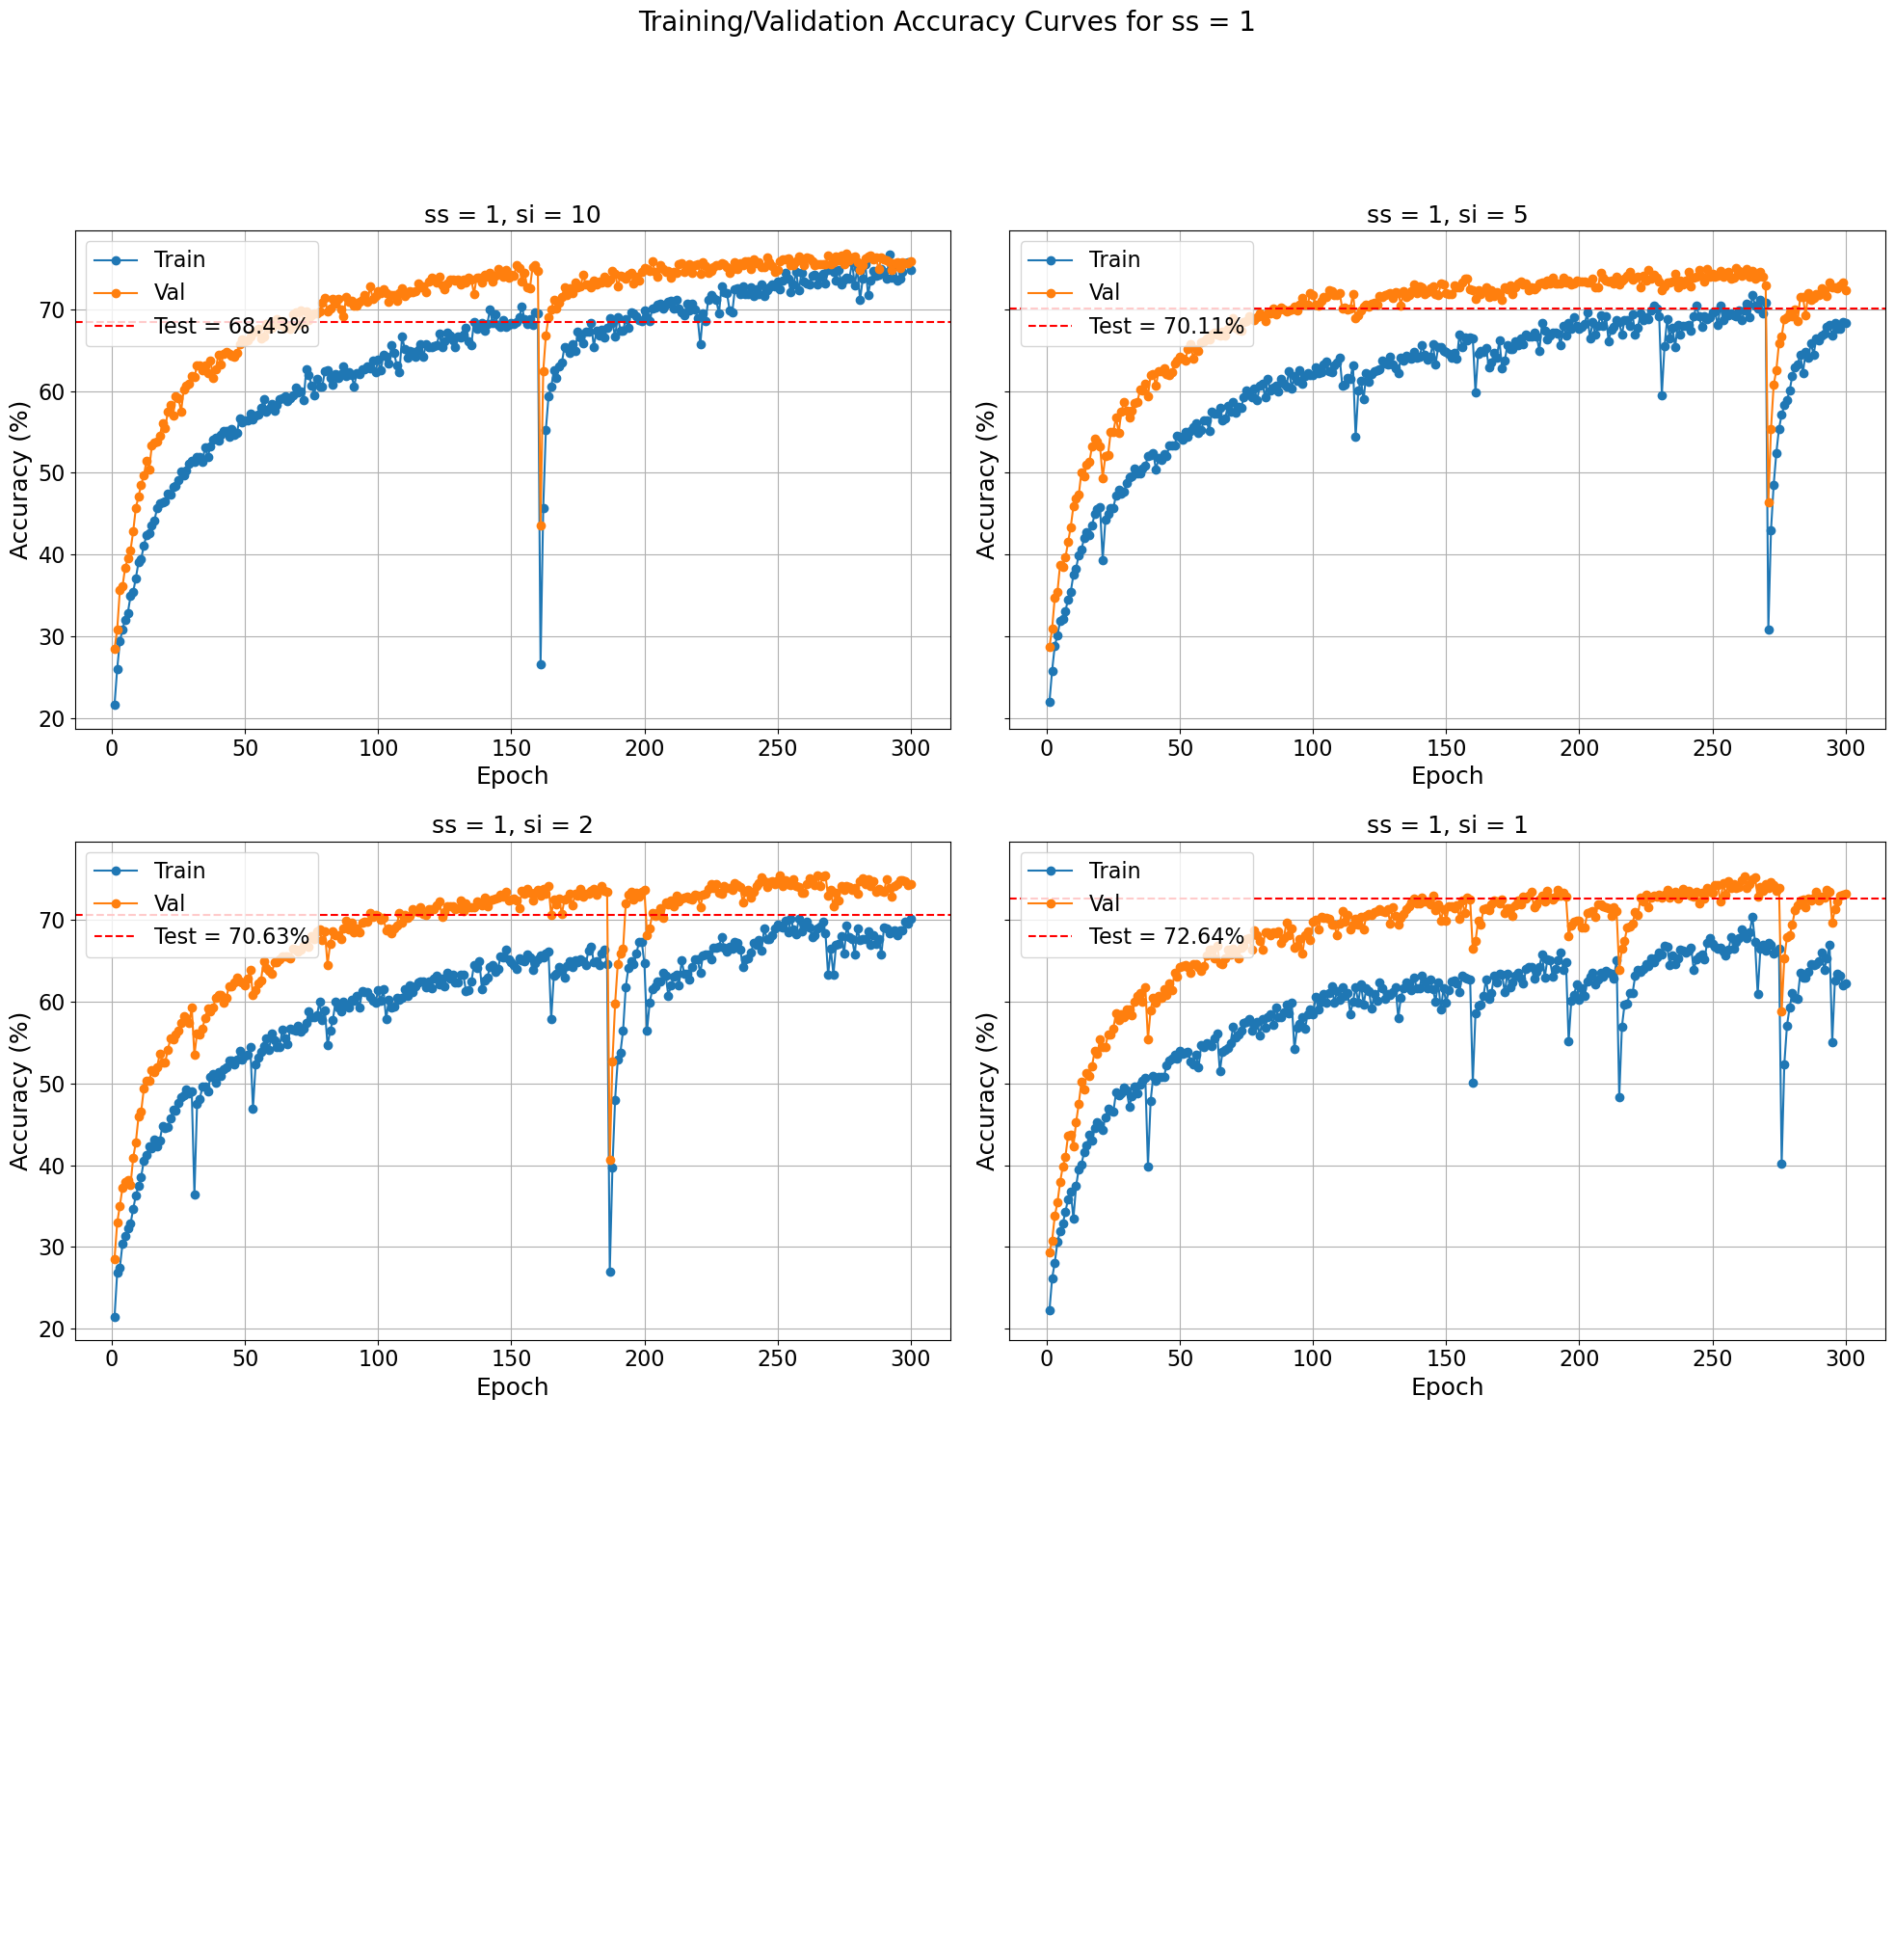

In [26]:
plot_accuracies_for_strategy(files, ss_value=1)

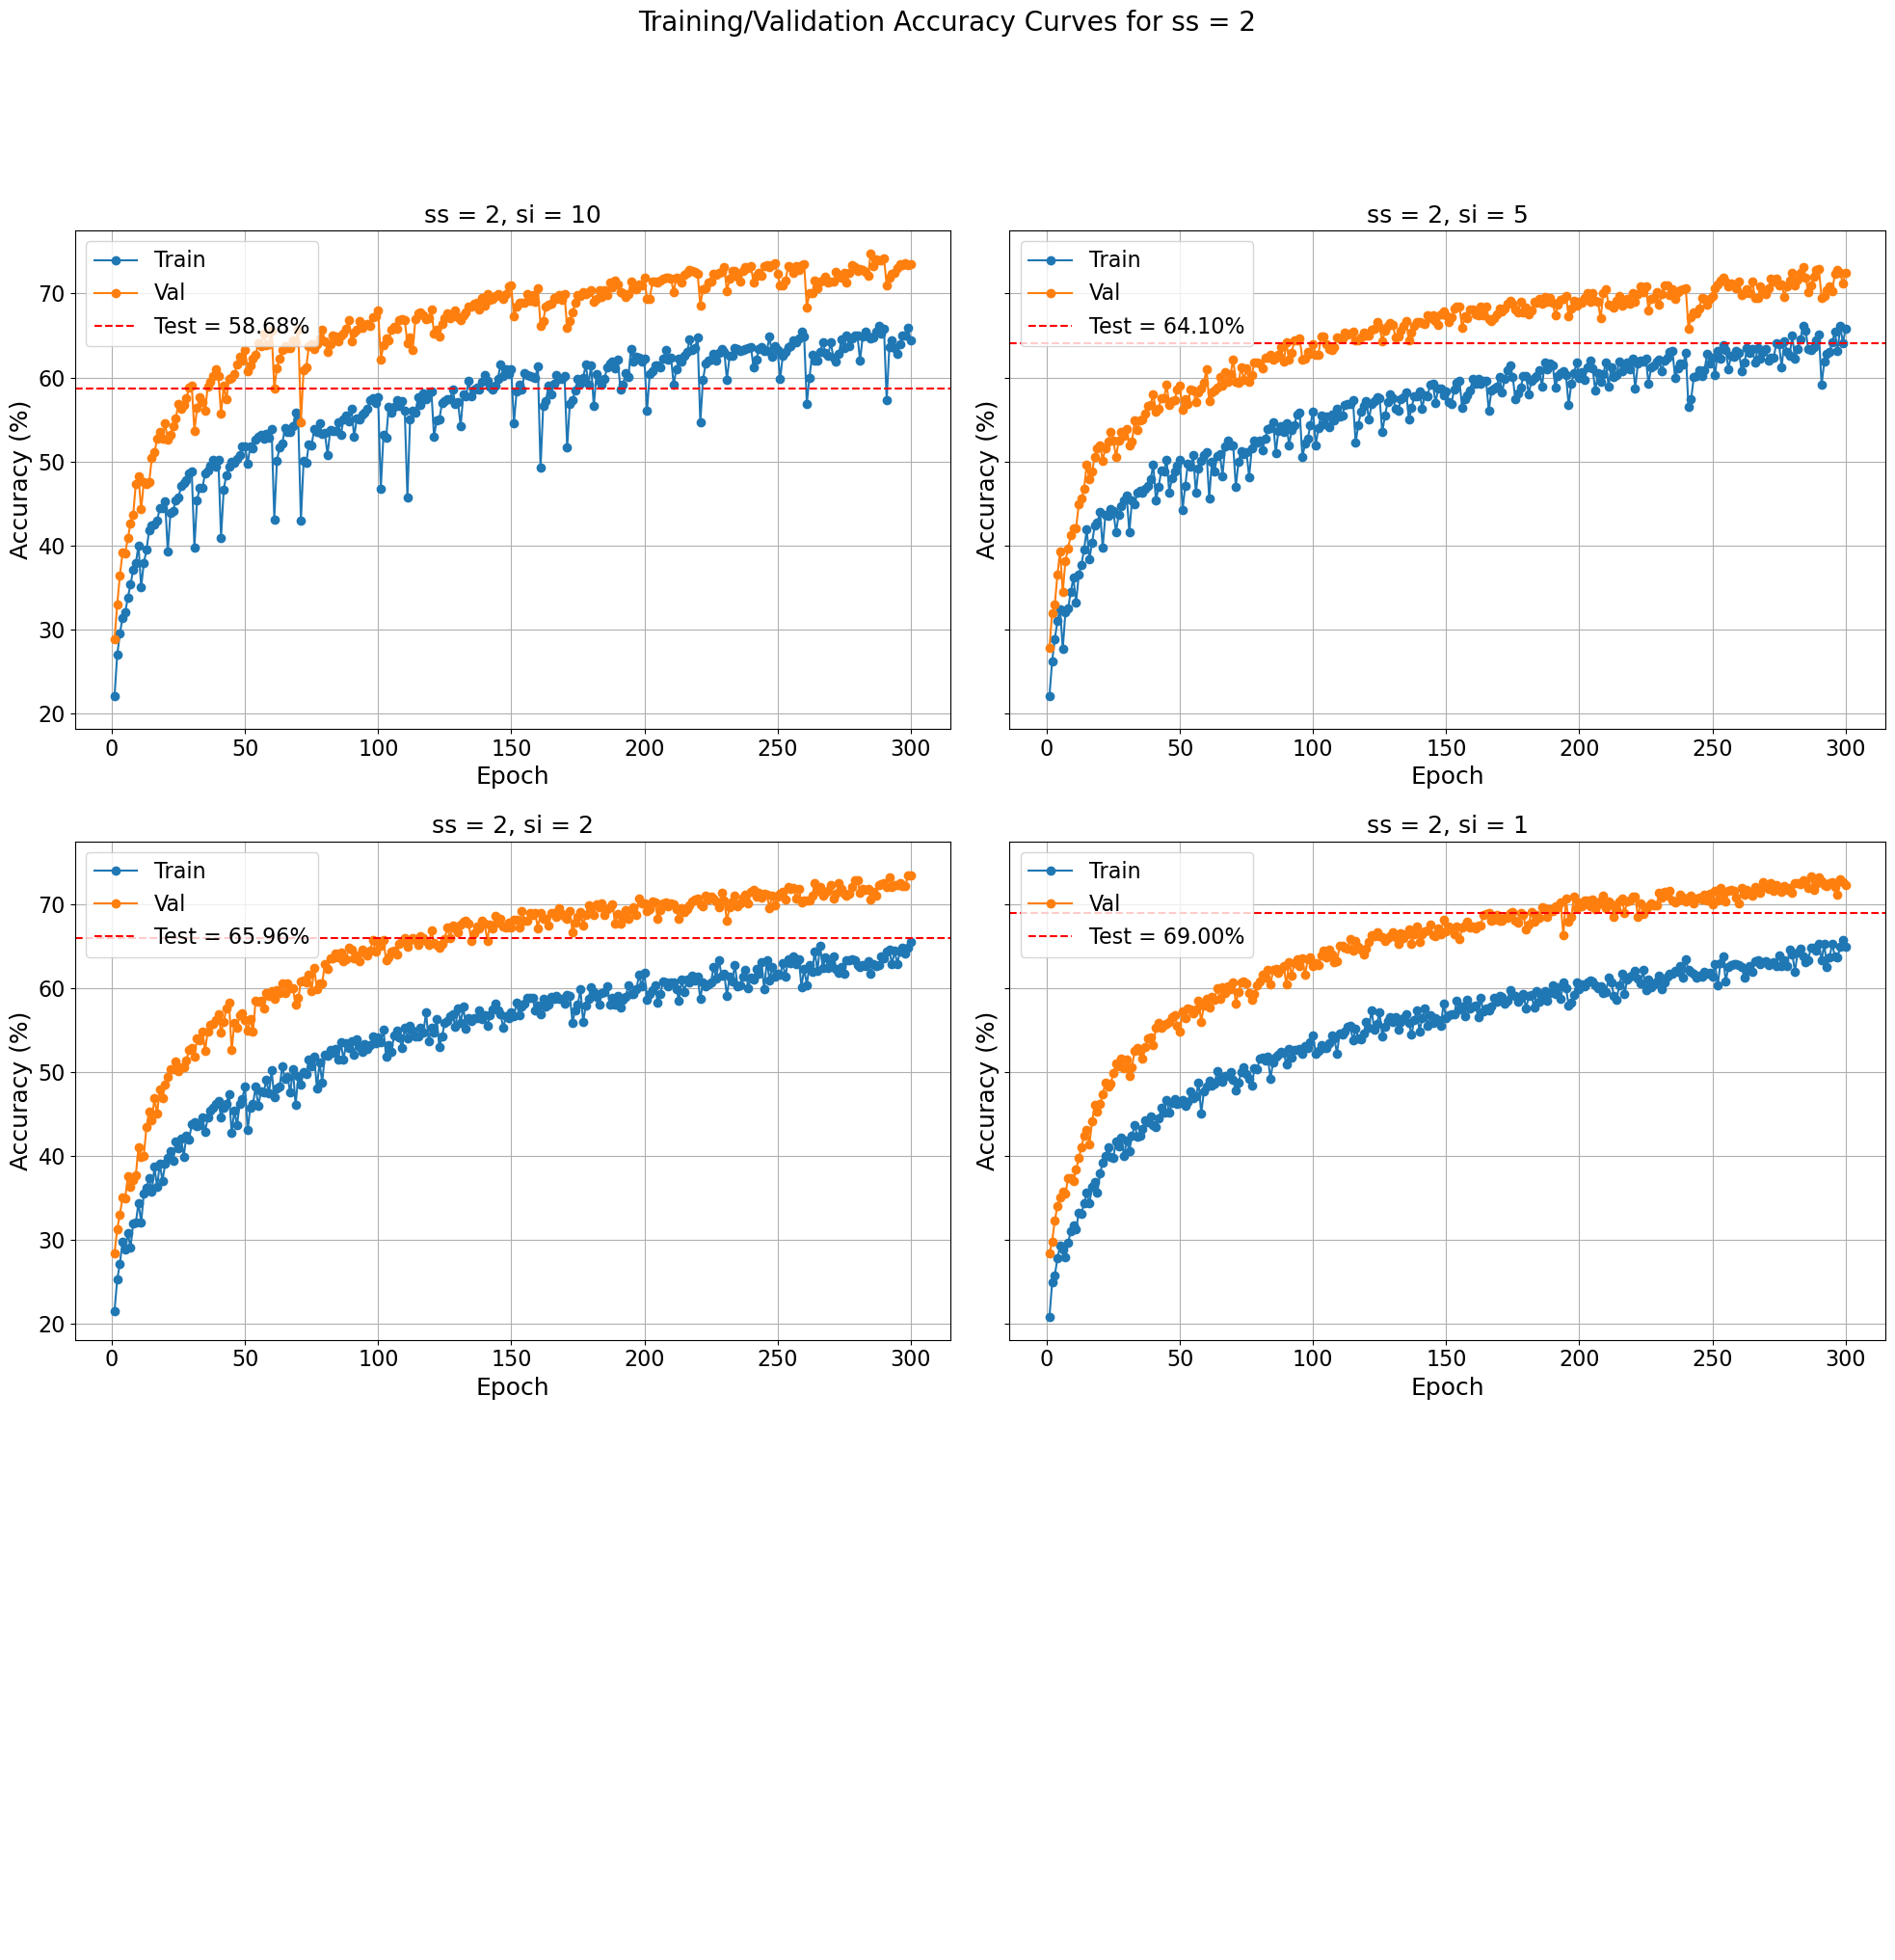

In [27]:
plot_accuracies_for_strategy(files, ss_value=2)

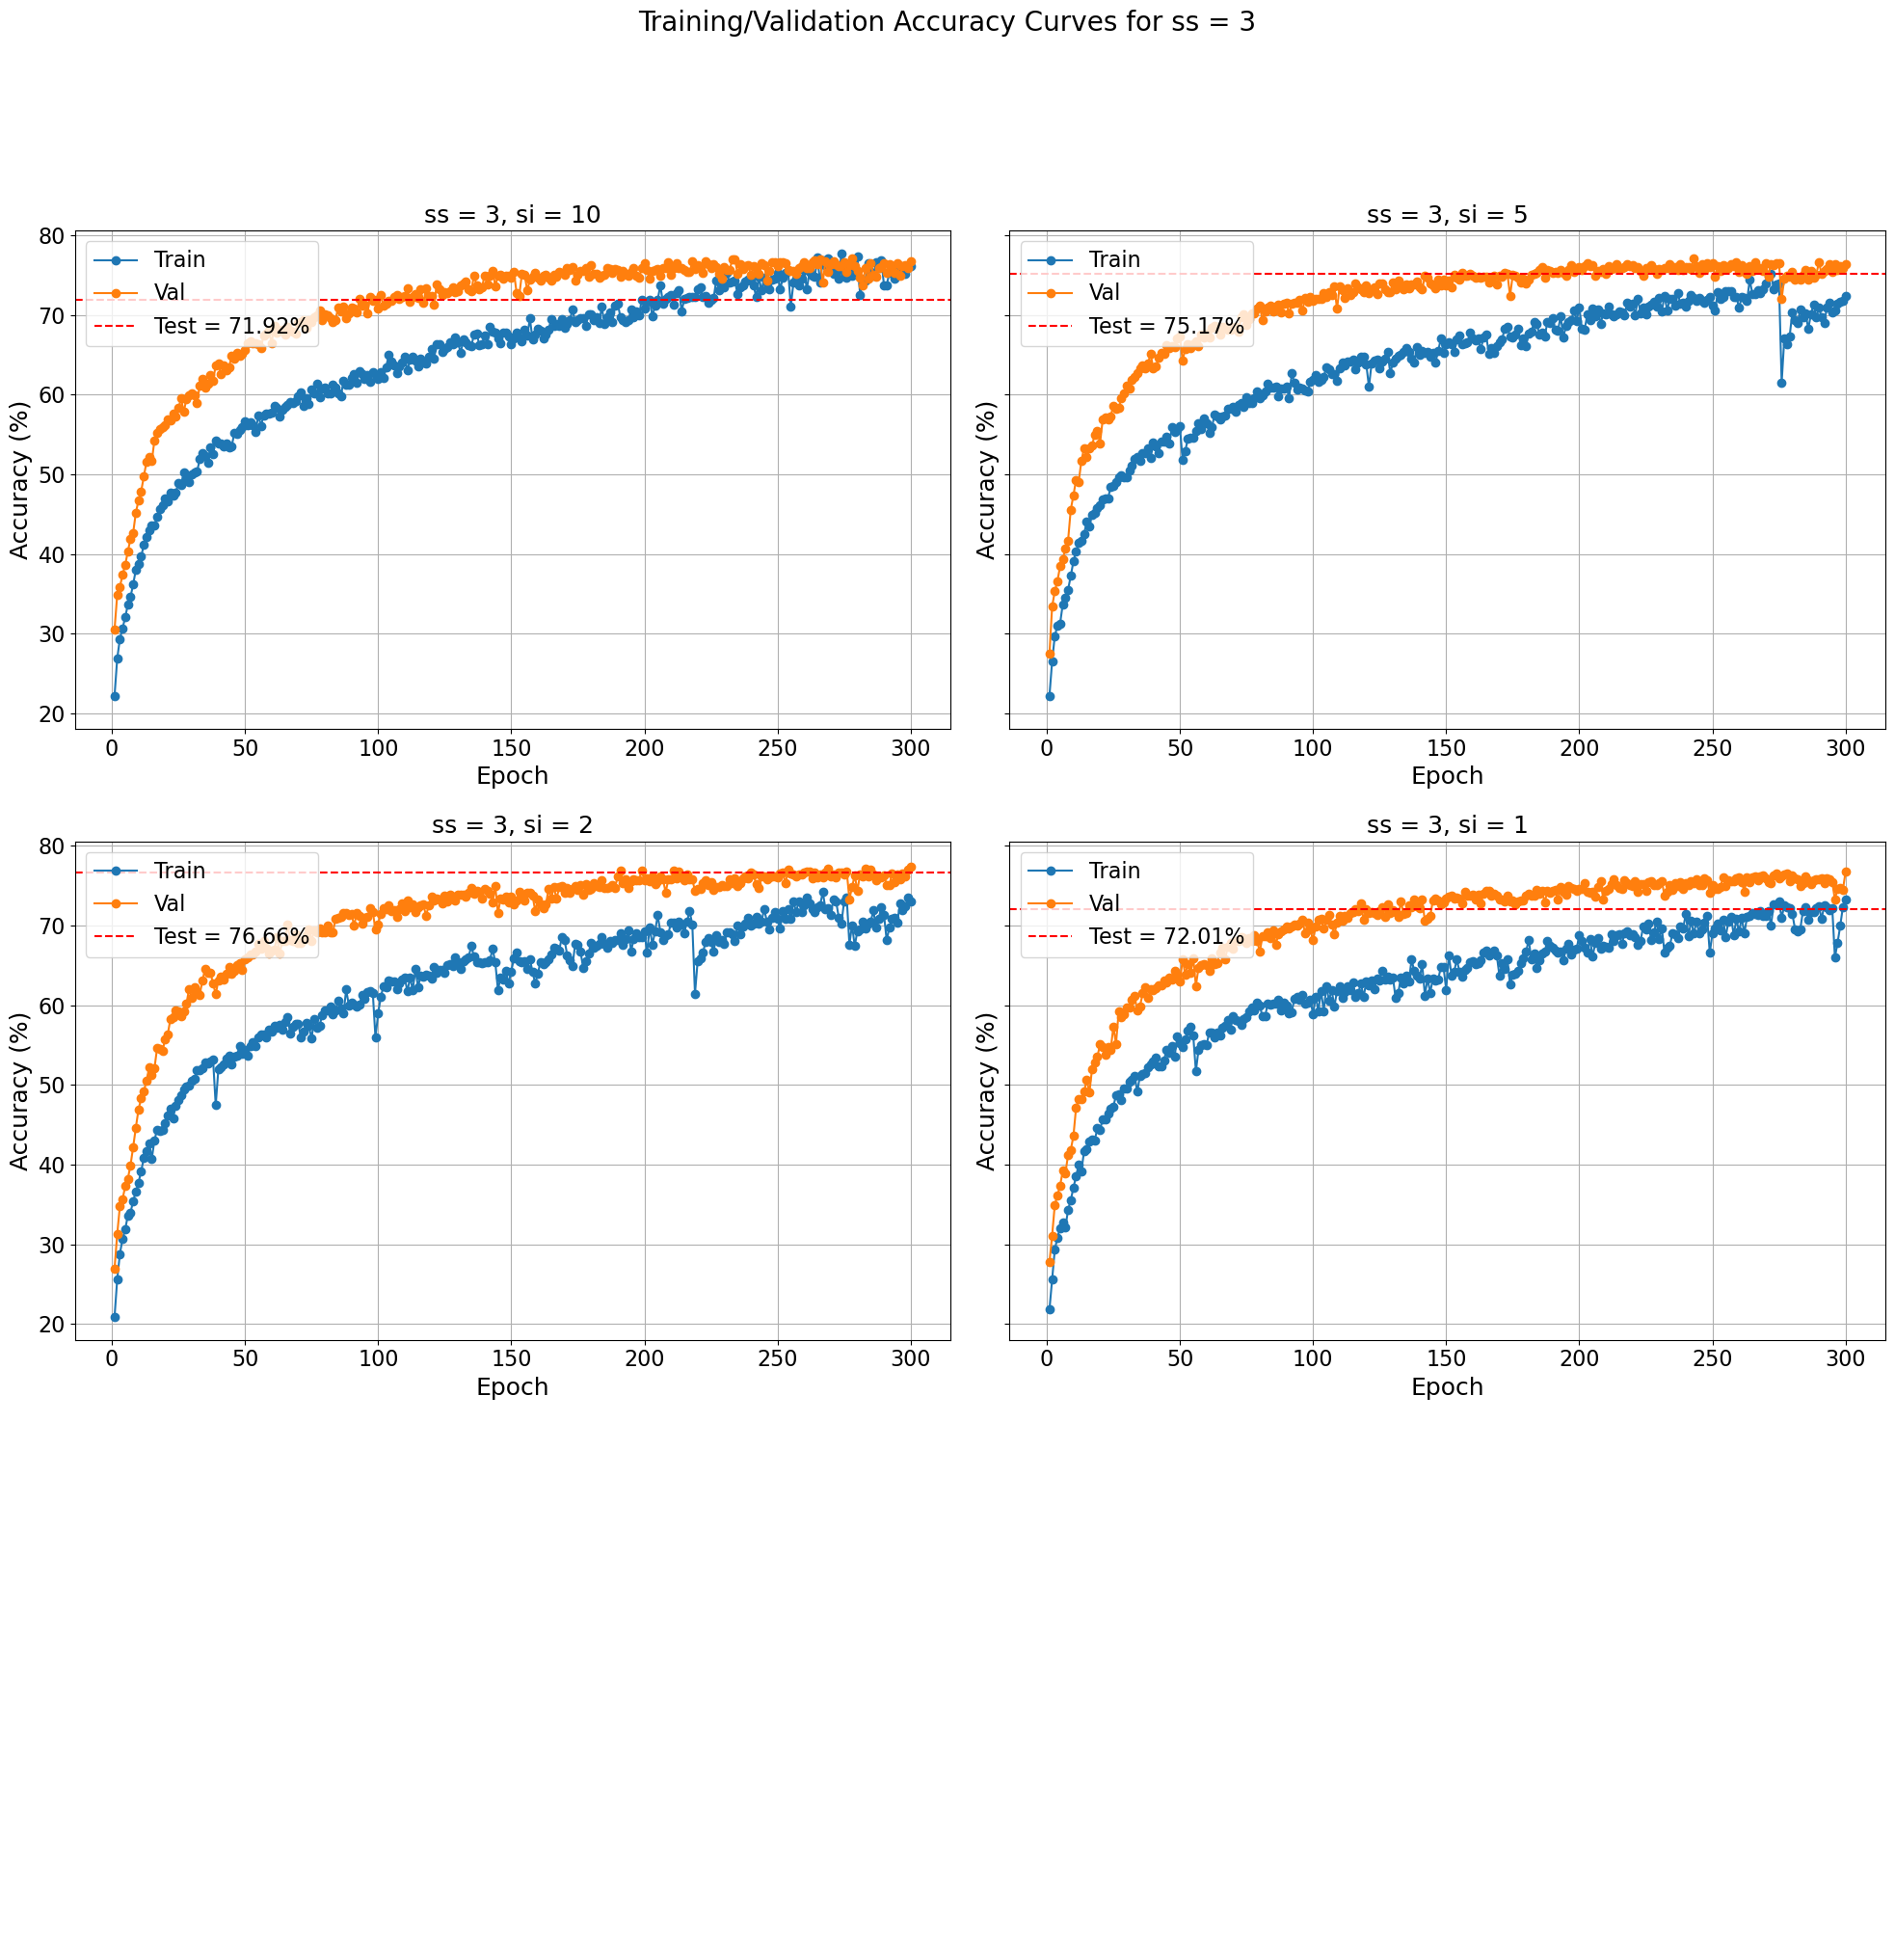

In [28]:
plot_accuracies_for_strategy(files, ss_value=3)

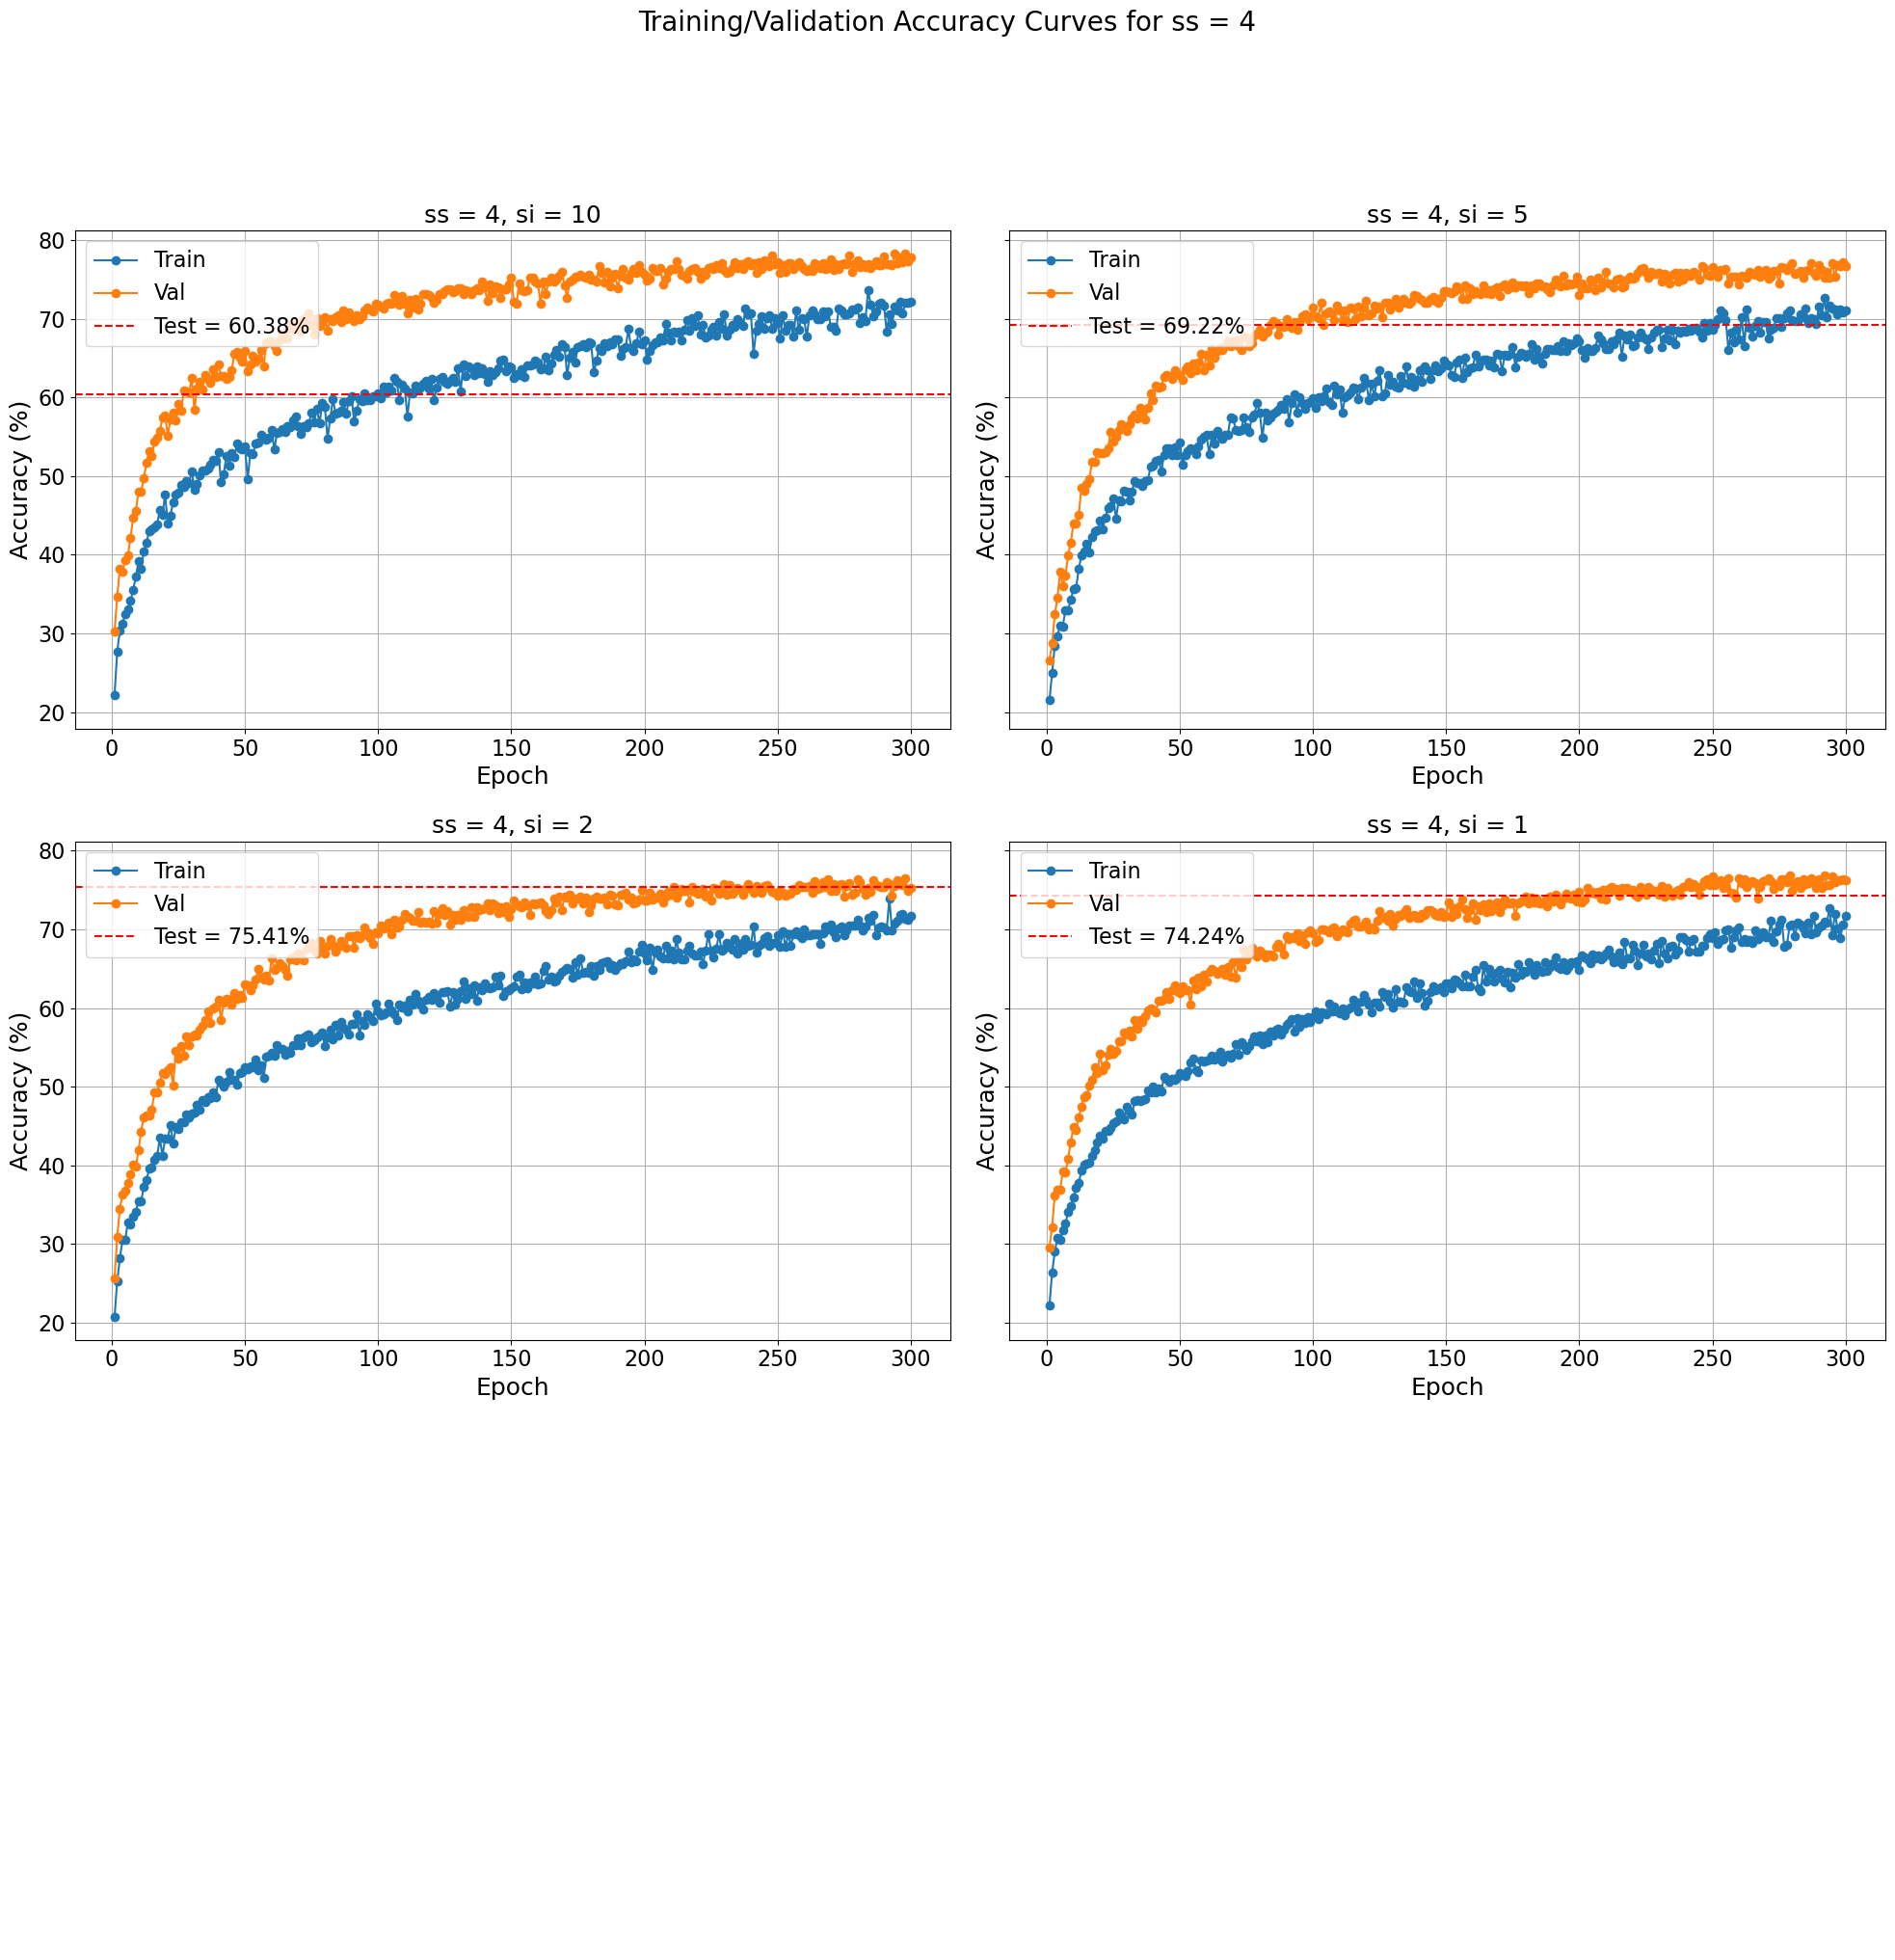

In [29]:
plot_accuracies_for_strategy(files, ss_value=4)

In [41]:
!ls

Does swapping makes layers closer?.ipynb
ET_accuracy_plots.ipynb
data
et_full_accuracy_plot.pdf
et_full_accuracy_plots.pdf
et_ss1_accuracy_plot.pdf
et_ss2_accuracy_plot.pdf
et_ss3_accuracy_plot.pdf
et_ss4_accuracy_plot.pdf
et_standard_accuracy_plot.pdf
image_et
model_20250218_165037_bl1_ts12_bs128.pth
model_20250218_170429_bl12_ts1_bs128.pth
model_20250218_171155_bl12_ts1_bs128_si10_ss1.pth
model_20250218_181432_bl12_ts1_bs128_si5_ss1.pth
model_20250218_191848_bl12_ts1_bs128_si2_ss1.pth
model_20250218_202230_bl12_ts1_bs128_si1_ss1.pth
model_20250218_212821_bl12_ts1_bs128_si10_ss2.pth
model_20250218_223241_bl12_ts1_bs128_si5_ss2.pth
model_20250218_233527_bl12_ts1_bs128_si2_ss2.pth
model_20250219_003935_bl12_ts1_bs128_si1_ss2.pth
model_20250219_014311_bl12_ts1_bs128_si10_ss3.pth
model_20250219_024647_bl12_ts1_bs128_si5_ss3.pth
model_20250219_035025_bl12_ts1_bs128_si2_ss3.pth
model_20250219_045353_bl12_ts1_bs128_si1_ss3.pth
model_20250219_055732_bl12_ts1_bs128_si10_ss4.pth
model_20250219_

In [42]:
state_dict = torch.load("model_20250218_165037_bl1_ts12_bs128.pth", map_location="cpu")
print(state_dict.keys())


odict_keys(['_orig_mod.cls', '_orig_mod.encode.0.weight', '_orig_mod.encode.0.bias', '_orig_mod.decode.0.gamma', '_orig_mod.decode.0.bias', '_orig_mod.decode.1.weight', '_orig_mod.decode.1.bias', '_orig_mod.pos.weight', '_orig_mod.blocks.0.0.gamma', '_orig_mod.blocks.0.0.bias', '_orig_mod.blocks.0.1.hn.proj.weight', '_orig_mod.blocks.0.1.attn.wq', '_orig_mod.blocks.0.1.attn.wk'])


/var/folders/7c/zq5pjc5156v6v5k591lqrbgc0000gp/T/ipykernel_50575/2155002159.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("model_20250218_16503

In [3]:
import torch

In [45]:
import torch
from image_et.core import ET, Patch

def check_weight_mapping(teacher_checkpoint_path):
    # Load teacher checkpoint into teacher_state
    teacher_state = torch.load(teacher_checkpoint_path, map_location="cpu")
    
    print("Teacher checkpoint keys:")
    for key in teacher_state.keys():
        print(f"  {key}")
    
    # Create the student model instance.
    # (Using dummy input to set dimensions as in your training script.)
    patch = Patch(dim=4)
    dummy_input = torch.randn(1, 3, 32, 32)
    student_model = ET(
        dummy_input,
        patch,
        num_classes=10,
        tkn_dim=128,
        qk_dim=64,
        nheads=8,
        hn_mult=4.0,
        attn_beta=0.125,
        attn_bias=False,
        hn_bias=False,
        time_steps=12,
        blocks=1,
        swap_interval=None,
        swap_strategy=1
    )
    
    student_state = student_model.state_dict()
    print("\nStudent model state_dict keys:")
    for key in student_state.keys():
        print(f"  {key}")

    # Prepare a new state dictionary for mapping.
    state_dict = {}
    
    # --- Map block parameters ---
    block_teacher_prefix = "_orig_mod.blocks.4."
    block_student_prefix = "blocks.0."
    block_keys = [k for k in teacher_state if k.startswith(block_teacher_prefix)]
    
    print("\nMapping block keys:")
    for key in block_keys:
        new_key = key.replace(block_teacher_prefix, block_student_prefix)
        teacher_tensor = teacher_state[key]
        if new_key in student_state:
            student_tensor = student_state[new_key]
            print(f"Mapping teacher {key} (shape: {teacher_tensor.shape}) to student {new_key} (shape: {student_tensor.shape})")
        else:
            print(f"Warning: Student key {new_key} not found!")
        state_dict[new_key] = teacher_tensor

    # --- Map encoder, decoder, and other parameters ---
    mapping = {
        "cls": "_orig_mod.cls",
        "encode.0.weight": "_orig_mod.encode.0.weight",
        "encode.0.bias": "_orig_mod.encode.0.bias",
        "decode.0.gamma": "_orig_mod.decode.0.gamma",
        "decode.0.bias": "_orig_mod.decode.0.bias",
        "decode.1.weight": "_orig_mod.decode.1.weight",
        "decode.1.bias": "_orig_mod.decode.1.bias",
        "pos.weight": "_orig_mod.pos.weight",
    }
    
    print("\nMapping encoder/decoder keys:")
    for student_key, teacher_key in mapping.items():
        if teacher_key in teacher_state:
            teacher_tensor = teacher_state[teacher_key]
            if student_key in student_state:
                student_tensor = student_state[student_key]
                print(f"Mapping teacher {teacher_key} (shape: {teacher_tensor.shape}) to student {student_key} (shape: {student_tensor.shape})")
            else:
                print(f"Warning: Student key {student_key} not found!")
            state_dict[student_key] = teacher_state[teacher_key]
        else:
            print(f"Warning: Teacher key {teacher_key} not found for student key {student_key}")

    # --- Load mapped weights into the student model ---
    # Using strict=False for debugging purposes.
    missing_keys, unexpected_keys = student_model.load_state_dict(state_dict, strict=False)
    
    print("\nAfter loading mapped weights:")
    print("Missing keys:", missing_keys)
    print("Unexpected keys:", unexpected_keys)
    
    print("\nFinal student model state_dict keys and norms:")
    for k, v in student_model.state_dict().items():
        print(f"  {k}: shape {v.shape}, norm {v.norm():.4f}")

if __name__ == "__main__":
    teacher_checkpoint_path = "model_20250218_171155_bl12_ts1_bs128_si10_ss1.pth"
    check_weight_mapping(teacher_checkpoint_path)


Teacher checkpoint keys:
  _orig_mod.cls
  _orig_mod.encode.0.weight
  _orig_mod.encode.0.bias
  _orig_mod.decode.0.gamma
  _orig_mod.decode.0.bias
  _orig_mod.decode.1.weight
  _orig_mod.decode.1.bias
  _orig_mod.pos.weight
  _orig_mod.blocks.0.0.gamma
  _orig_mod.blocks.0.0.bias
  _orig_mod.blocks.0.1.hn.proj.weight
  _orig_mod.blocks.0.1.attn.wq
  _orig_mod.blocks.0.1.attn.wk
  _orig_mod.blocks.1.0.gamma
  _orig_mod.blocks.1.0.bias
  _orig_mod.blocks.1.1.hn.proj.weight
  _orig_mod.blocks.1.1.attn.wq
  _orig_mod.blocks.1.1.attn.wk
  _orig_mod.blocks.2.0.gamma
  _orig_mod.blocks.2.0.bias
  _orig_mod.blocks.2.1.hn.proj.weight
  _orig_mod.blocks.2.1.attn.wq
  _orig_mod.blocks.2.1.attn.wk
  _orig_mod.blocks.3.0.gamma
  _orig_mod.blocks.3.0.bias
  _orig_mod.blocks.3.1.hn.proj.weight
  _orig_mod.blocks.3.1.attn.wq
  _orig_mod.blocks.3.1.attn.wk
  _orig_mod.blocks.4.0.gamma
  _orig_mod.blocks.4.0.bias
  _orig_mod.blocks.4.1.hn.proj.weight
  _orig_mod.blocks.4.1.attn.wq
  _orig_mod.blocks.4.

/var/folders/7c/zq5pjc5156v6v5k591lqrbgc0000gp/T/ipykernel_50575/3766631439.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  teacher_state = torch.load(teacher_checkpoint